
# Applications of Data Analysis 2019

# Pain assessment from biosignal data - Exercise

# DIEGO SANZ VILLAFRUELA


# Python modules - Libraries



In [9]:
import random
import math
import numpy as np
import pandas as pd
from sklearn import neighbors
%matplotlib inline

## Used methods

- standardization (Pandas)

- knn (sklearn)

- lso-cv

In [10]:
"""
Gets samples from CSV file.
"""                
def get_samples(filename):
    samples = []
    with open(filename) as f:
        lines_iter = iter(f.readlines())

        next(lines_iter) # c_total,Cd,Pb,Mod1,Mod2,Mod3
        for line in lines_iter:
            line = line.rstrip("\n\r")
            sample = []
            for value in line.split(","):
                sample.append(float(value)) 
            samples.append(sample)
    return np.array(samples)

""" Performance measure that indicates how well the model captures the relative ordering/ranking
of the data points.
C-index is measured from 0 to 1, with 0.5 meaning the model wasn't able to capture any information
from the data.
"""
def getCIndex(labels, predictions):
    if labels is None or predictions is None:
        raise Exception("Illegal argument exception")
    if len(labels) != len(predictions):
        raise Exception("The number of labels is not the same to the number of predictions")
        
    size = len(labels)
    h_num = 0
    n = 0
    for i in range(size):
        li = labels[i]
        pi = predictions[i]
        for j in range(i+1,size):
            lj = labels[j]
            pj = predictions[j]
            if ( li != lj):
                n += 1
                if (pi < pj and li < lj) or (pi > pj and li > lj):
                    h_num += 1
                elif pi == pj:
                    h_num += 0.5 # -1 0.5 1
    return h_num/n


def leave_subject_out_cross_validation_knn(dfs, n_neighbors = 1):

    subject_performances = {}
    
    for subject in dfs.subject.unique():
        
        test_subject_dfs = dfs[dfs.subject == subject]
        training_subjects_dfs = dfs[dfs.subject != subject]
    
        # Use KNN with Euclidean distance uniform weights k value 37
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
        predictions = knn.fit(training_subjects_dfs[FEATURE_FIELDS], training_subjects_dfs.label).predict(test_subject_dfs[FEATURE_FIELDS])
        
        subject_performance = getCIndex(labels=test_subject_dfs.label.to_numpy(), predictions=predictions)
        
        subject_performances[subject] = subject_performance
    
    return pd.DataFrame(subject_performances.items(),columns=['subject', 'performance']);


samples = get_samples(r"paindata.csv")

ALL_FIELDS = ['subject', 'test', 'label', 'label_time', 'feat1', 'feat2', 'feat3', 'feat4']
FEATURE_FIELDS = ['feat1', 'feat2', 'feat3', 'feat4']


zscore = lambda x: (x - x.mean()) / x.std()

# dataframe creation
df = pd.DataFrame(samples, columns=ALL_FIELDS)

# standardization on subject level
dfs = df.copy()
dfs[FEATURE_FIELDS] = dfs[FEATURE_FIELDS].groupby(dfs['subject']).transform(zscore)


subject_performances = leave_subject_out_cross_validation_knn(dfs, 37)


# Performance (k=1, n_neighbours = 37)

<b>C-index(Mean):</b> 0.628499

<b>C-index(Min):</b> 0.487676

<b>C-index(Max):</b> 0.815683

In [11]:
subject_performances.describe()

,subject,performance
count,31.000000,31.000000
mean,16.000000,0.628499
std,9.092121,0.084031
min,1.000000,0.487676
25%,8.500000,0.563950
50%,16.000000,0.641005
75%,23.500000,0.677726
max,31.000000,0.815683


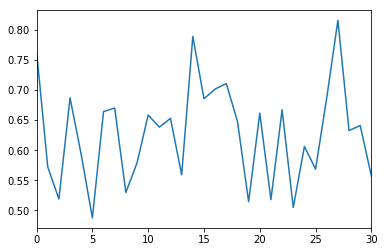

In [12]:
subject_performances.performance.plot()


# DIEGO SANZ VILLAFRUELA

There are many peeks in the c-index between patients. Many of them have a good c-index, whereas others have a really bad one around 0.

It would be good to remove those patients or tests whose description of pain was not very accurate, 
such as patient 4, whose c-index is 0.487676 .

The global(average) c-index is 0.696839, so it is good enough but not very descriptive to validate the model.

In [13]:
subject_performances

,subject,performance
0,1.0,0.764118
1,2.0,0.572407
2,3.0,0.519044
3,4.0,0.686840
4,5.0,0.592664
5,6.0,0.487676
6,7.0,0.664114
7,8.0,0.670057
8,9.0,0.529903
9,10.0,0.578952
